<h1>Data Science Programming Assignment 2</h1>

<i>Assignment Submission for Group 6- Rochan Nehete, Manvi Goyal and Anudeep Kumar Akkana</i>

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

<h2>[Q1, 6 points] Create a unique name for each restaurant</h2>

In [2]:
df['RESTAURANT']=df['DBA']+" "+df['BUILDING']+" "+df['STREET']+" "+df['ZIPCODE']+" "+df['BORO']
#Create a new column 'Restaurant' in dataframe by concatenating various columns already present in dataset using "+" operator
df['RESTAURANT'].head(10)
#First 10 rows of the new column 'restaurant' is printed using head()function

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

<h2>[Q2, 6 points] How many restaurants are included in the data?</h2>

In [3]:
unique_restaurants=len(df.drop_duplicates(subset="RESTAURANT"))
# Drop the duplicates present in 'restaurant' column using drop_duplicate()function
# The total number of unique restaurants are found out using len()
print("There are",unique_restaurants, "unique restaurants")
# print() function is used to show the final output

There are 10114 unique restaurants


<h2>[Q3, 6 points] How many chains are there?</h2>

In [4]:
total_restaurant_chains = sum(df[['RESTAURANT','DBA']].drop_duplicates()['DBA'].value_counts()>=2)
# Drop the duplicates present in 'DBA' column using drop_duplicate() function
# Using value_counts(), restaurants present in at least 2 different locations are found out 
# The total number of restaurants chains are calculated out using sum()
print("There are total "+str(total_restaurant_chains)+" restaurant chains")
# print() function is used to show the final output
# total_restaurant_chains is converted from int to string using str()

There are total 368 restaurant chains


<AxesSubplot:>

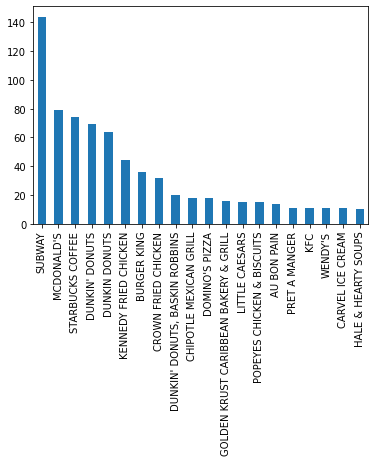

In [5]:
df[['RESTAURANT','DBA']].drop_duplicates()['DBA'].value_counts().head(20).plot(kind='bar')
#Using head(), top 20 popular chains are found out
#plot() is used to plot the chains as a bar graph 

<h2>[Q5, 6 points] What fraction of all restaurants are chain restaurants?</h2>

In [6]:
total_non_chain_restaurants=sum(df[['RESTAURANT','DBA']].drop_duplicates()['DBA'].value_counts()<2)
#Drop the duplicates present in using drop_duplicate()function
#Using value_counts(), non_chain_restaurants are found out 
#The total number of non_chain_restaurants are calculated out using sum()
fraction = (unique_restaurants - total_non_chain_restaurants)/unique_restaurants
#Fraction is found out using operator */*
print ('There are', round(fraction,4), 'of all restaurants that are chains')
#round() is used to round up the floating fraction upto 4 decimal digits
#print() function is used to show the final output

There are 0.1647 of all restaurants that are chains


<h2>[Q6, 6 points] Plot the number of non-chain restaurants in each boro?</h2>

<AxesSubplot:>

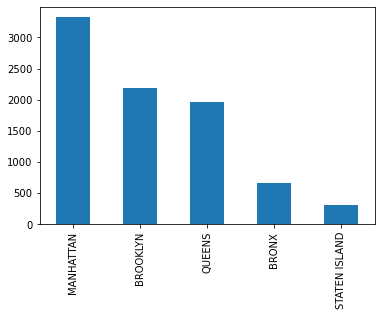

In [7]:
#Replacing 'Missing' Value from the BORO column with nan
df.replace( "Missing" , np.nan ,inplace = True)

#Unique Restaurant Column
unique_restaurant = df.drop_duplicates(subset=['DBA','BUILDING','STREET','ZIPCODE','BORO'])

#Defining mask to get segregation of non chain and chain restaurants
Mask = unique_restaurant['DBA'].value_counts()<2

#defining dataframe segregation_chain to get the values of DBA as index and splitter representing its associated value of chains
segregation_chain = pd.DataFrame({'DBA':Mask.index,'Splitter':Mask.values})

#creating a new dataframe by merging unique and segregation_chain dataframes with the help of DBA column                                  
resturant_segregation_joined = unique_restaurant.merge(segregation_chain, 
                     left_on='DBA',
                    right_on='DBA'
                     )
                                   
#Plotting the graph of non chain restaurants in each boro
resturant_segregation_joined[resturant_segregation_joined['Splitter'] == 1]['BORO'].value_counts().plot(kind = 'bar')



<h2>[Q7, 8 points] Plot the fraction of non-chain restaurants in each boro.</h2>

<AxesSubplot:>

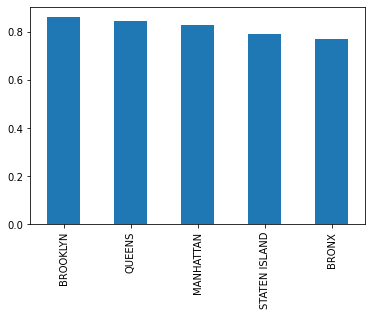

In [8]:
#finding non chain restaurants in each boro
Non_ChainRestaurants_BORO = resturant_segregation_joined[resturant_segregation_joined['Splitter'] == 1]['BORO'].value_counts()
#finding total restaurants in each boro
Total_Restaurant_BORO = resturant_segregation_joined['BORO'].value_counts()
#finding fraction of non chain restaurants
Fraction_of_NonChain = Non_ChainRestaurants_BORO/Total_Restaurant_BORO
#plotting fraction of non chain restaurants in each boro
#values are sorted in descending order using sort_values()
Fraction_of_NonChain.sort_values(ascending = False).plot(kind = 'bar')

<h2>[Q8, 6 points] Plot the popularity of cuisines.</h2>

<AxesSubplot:>

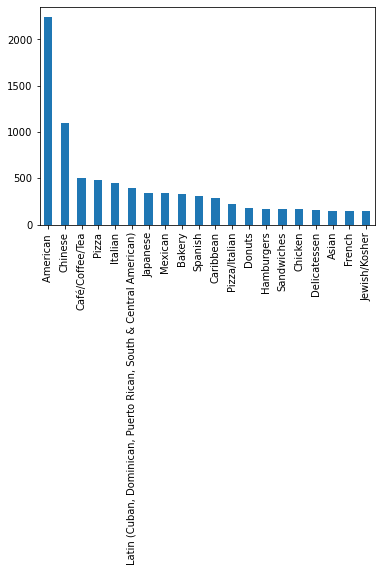

In [9]:
cuisine_restaurant = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()
#Drop the duplicate values present in the data using drop_duplicate()function
cuisine_restaurant['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')
#Value_count()is used to find top 20 values
#plot()is used to plot top 20 values in bar graph 

<h2>[Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations.</h2>

<AxesSubplot:>

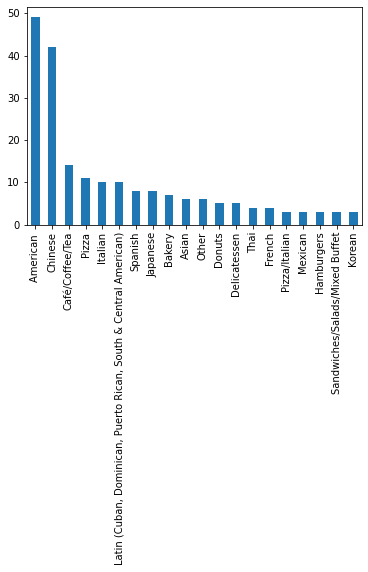

In [10]:
cuisine_citation=df[['CUISINE DESCRIPTION','RESTAURANT','VIOLATION CODE']].drop_duplicates()
#Drop the duplicates present in the data using drop_duplicate()function
citations_not_given = cuisine_citation[cuisine_citation['VIOLATION CODE'].isna()]
#Missing values are detected using isna()function
citations_given = cuisine_citation[~cuisine_citation['VIOLATION CODE'].isna()]
# Not null values are detected in the data using isna() and operator *~*
clean_cuisines=citations_not_given[~citations_not_given['RESTAURANT'].isin(citations_given['RESTAURANT'])]
#isin()function is used to check if each row in the dataframe contains value or not
#negation of the output is done using operator *~*
clean_cuisines['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')
#Top 20 clean_cuisines are found out using value count() and plotted as a bar chart using plot()function

<h2>[Q10, 6 points] What cuisines tend to be the “cleanest”?</h2>

In [11]:
b=cuisine_restaurant['CUISINE DESCRIPTION'].value_counts()>=20
# Using value_count(), the cuisines that is represented in at least 20 restaurants is found out
(clean_cuisines['CUISINE DESCRIPTION'].value_counts()[b]/cuisine_restaurant['CUISINE DESCRIPTION'].value_counts()[b]).sort_values(ascending = False)[:10]
# The ratio of restaurants is sorted in descending order using sort_values() and top 10 values are found out

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

<h2>[Q11, 8 points] What are the most common violations in each borough?</h2>

In [12]:
#boro_vio_desc dataframe has been created with columns 'BORO' and 'VIOLATION DESCRIPTION' 
boro_vio_desc=df[['BORO','VIOLATION DESCRIPTION']]

#simple cross tabulation of 'BORO' and 'VIOLATION DESCRIPTION' is done and frequency table has been computed
boro_vio_desc_cross=pd.crosstab(boro_vio_desc['VIOLATION DESCRIPTION'],boro_vio_desc['BORO'])
#idxmax() is used to return index for the maximum value in each column
#Use dropna() function to remove 'NAN' values row present in BORO column 
boro_vio_desc_cross.idxmax().dropna()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

<h2>[Q12, 9 points] What are the most common violations per borough, after normalizing for the relative abundance of each violation?</h2>

In [13]:
#using value_count(),the frequencies of violations are computed and stored in violationFrequency
violationFrequency=boro_vio_desc['VIOLATION DESCRIPTION'].value_counts()

#divide with crosstab elements taking violationFrequency items, Transposing and dropping Missing Boro
temp=pd.concat([pd.Series(boro_vio_desc_cross.loc[k]/v, name=k) for k,v in violationFrequency.items()], axis=1).T.dropna()

#since idxmax gives only one max value in order to get all max values, get max elements and reset index
calc_max=pd.DataFrame(temp.max(),columns = ['values']).reset_index()

#melt the dataframe to get Boro in row
temp_melt = pd.melt(temp.reset_index(), id_vars='index', value_vars=list(temp.columns))
#Merging dataframes "calc_max" and "temp_melt" based on 'BORO' and 'values'
common_violations = pd.merge(calc_max, temp_melt, left_on=['BORO', 'values'], right_on=['BORO', 'value'], how = 'left') 
#join with max df on Boro and values
common_violations

,BORO,values,index,value
0,BRONX,0.500000,Unprotected food re-served.,0.500000
1,BROOKLYN,0.714286,Precooked potentially hazardous food from comm...,0.714286
2,MANHATTAN,1.000000,Out-of package sale of tobacco products observed.,1.000000
3,MANHATTAN,1.000000,Potable water supply inadequate. Water or ice ...,1.000000
4,QUEENS,1.000000,Raw food not properly washed prior to serving.,1.000000
5,QUEENS,1.000000,Caloric content range (minimum to maximum) not...,1.000000
6,QUEENS,1.000000,"Harmful, noxious gas or vapor detected. CO ~1 ...",1.000000
7,STATEN ISLAND,0.090909,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909


<h2>[Q13, 8 points] How many phone area codes correspond to a single zipcode?</h2>

In [14]:
phones=df
#getting the area code by returning only first 3 characters of string
phones['area_code']=phones['PHONE'].str[:3] 
#Drop the duplicates present using drop_duplicate()function
area_zip=phones[['area_code','ZIPCODE']].drop_duplicates()
#Using groupby function to get the count of phone area code corresponding to a 'ZIPCODE' 
c=area_zip.groupby(['area_code'],as_index = False)['ZIPCODE'].count()
#printing count of 'phone area codes' corresponding to a single zipcode
print("There are", len(c[c['ZIPCODE'] == 1]), "phone area codes corresponding to a single zipcode")

There are 34 phone area codes corresponding to a single zipcode


<h2>[Q14, 10 points] Find common misspellings of street names</h2>

In [15]:
#dataframe is defined
the_streets=df
#create the 3 columns
the_streets['STREET TYPE']=the_streets['STREET'].str.split().str[-1]

df['STREET BASE'] = df['STREET'].apply(lambda x : " ".join(i for i in x.split()[0:-1]))
df['STREET BASE & ZIP'] = df['STREET BASE'] + df['ZIPCODE']

#clean the columns in a different table
#duplicates and missing vaues are dropped
the_streets_clean = the_streets[['STREET TYPE','STREET BASE','STREET BASE & ZIP']].drop_duplicates().dropna()
the_streets_clean = the_streets_clean[the_streets_clean['STREET BASE'] != ""]

#do self join
self_join_streets=the_streets_clean.merge(the_streets_clean, on="STREET BASE & ZIP")
d=self_join_streets[self_join_streets['STREET TYPE_x'] != self_join_streets['STREET TYPE_y']]

#cross tabulation is done 
streets_crosstab=pd.crosstab(d['STREET TYPE_x'],d['STREET TYPE_y'])
temp_crosstab=streets_crosstab[['AVE','ST','RD','PL','BOULEARD','BULEVARD']]
temp_crosstab

#since idxmax gives only one max value in order to get all max values, get max elements and reset index
calc_max=pd.DataFrame(temp_crosstab.max(),columns = ['values']).reset_index()

#melt the dataframe to get Boro in row
temp_melt = pd.melt(temp_crosstab.reset_index(), id_vars='STREET TYPE_x', value_vars=list(temp_crosstab.columns))

#temp_melt
common_street_type = pd.merge(calc_max, temp_melt, left_on=['STREET TYPE_y', 'values'], right_on=['STREET TYPE_y', 'value'], how = 'left') #join with max df on Boro and values
common_street_type

,STREET TYPE_y,values,STREET TYPE_x,value
0,AVE,163,AVENUE,163
1,ST,94,STREET,94
2,RD,16,ROAD,16
3,PL,3,PLACE,3
4,BOULEARD,1,BLVD,1
5,BOULEARD,1,BOULEVARD,1
6,BULEVARD,1,BLVD,1
7,BULEVARD,1,BOULEVARD,1
